# One component 1D diffusion-reaction

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags_array, csc_array, eye_array
import scipy.sparse.linalg as sla

## a to g) Multi-component 1D counter-diffusion with reaction 

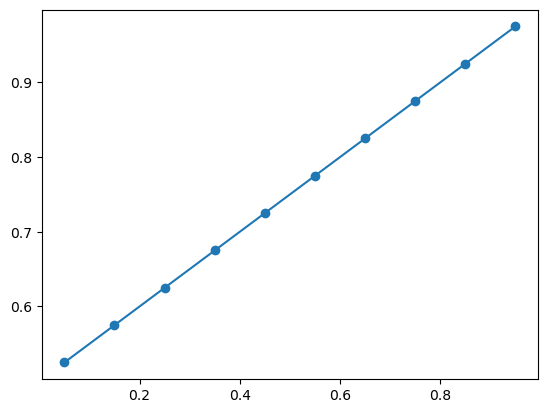

In [3]:
D = 1.0
L = 1.0
N = 10
dx = L/N
bc = {'a':[1,0],'b':[1,1], 'd':[0,1]}

offsets = [-1,0,1]
diagonals = [None]*3
diagonals[0] = np.full(N-1, D/(dx*dx))
diagonals[1] = np.full(N,-2*D/(dx*dx))
diagonals[2] = np.full(N-1, D/(dx*dx))

diagonals[1][0] = -D * (12.0*dx*bc['b'][0]+8.0*bc['a'][0])/(dx**2*(3*dx*bc['b'][0]+8*bc['a'][0]))
diagonals[2][0] = D * (4.0*dx*bc['b'][0]+8.0*bc['a'][0])/(dx**2*(3*dx*bc['b'][0]+8*bc['a'][0]))
diagonals[1][-1] = -D * (12.0*dx*bc['b'][1]+8.0*bc['a'][1])/(dx**2*(3*dx*bc['b'][1]+8*bc['a'][1]))
diagonals[0][-1] = D * (4.0*dx*bc['b'][1]+8.0*bc['a'][1])/(dx**2*(3*dx*bc['b'][1]+8*bc['a'][1]))

J_diff = diags_array(diagonals, offsets=offsets, shape=(N,N), format='csc')
f_diff_bc = csc_array(([8.0*bc['d'][0]/(dx*(3*dx*bc['b'][0]+8*bc['a'][0])), 8.0*bc['d'][1]/(dx*(3*dx*bc['b'][1]+8*bc['a'][1]))], ([0,N-1],[0,0])),shape=(N,1))

c = sla.spsolve(J_diff,-f_diff_bc)

x_f = np.linspace(0,L,N+1)
x_c = 0.5*(x_f[0:-1]+x_f[1:])
plt.plot(x_c,c,'-o')
plt.show()

## f,g) Including first order reaction

In [ ]:
sp.